In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import random
import math
import warnings
warnings.filterwarnings("ignore")
#from google.colab import files
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv1D, Bidirectional, GRU, Flatten, Activation, BatchNormalization,Input
from tensorflow.keras.callbacks import ModelCheckpoint

import keras
from keras.models import load_model
from keras_self_attention import SeqSelfAttention
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, LSTM, Activation, Bidirectional, Flatten, TimeDistributed, SimpleRNN, Dropout, GRU, Input, Add, Multiply,Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras import optimizers, initializers
from keras.regularizers import l2
from keras.initializers import TruncatedNormal, Constant, RandomNormal
from keras.layers.advanced_activations import LeakyReLU, ELU
from keras import backend as K 

import xlwt 
from xlwt import Workbook

#from fancyimpute import KNN

#set random seed for reproducibility
print(tf.__version__)

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
tf.random.set_random_seed(seed=42)
np.random.RandomState(42)
random.seed(42)
K.clear_session()
import pandas as pd
from pandas import DataFrame


from sklearn import preprocessing

1.15.0


In [62]:
b=pd.read_excel("Blueberries.xlsx")
pys=pd.read_excel("Ifeanyi soil yield price 5W.xlsx")
s=pys.iloc[:,2:3].values
x=pys.iloc[:,21:]

In [63]:
b

,Unnamed: 0,Volume-CS,Volume-CC,Volume_final,Pounds/Acre,Pounds/Acre NAN,Pounds/Acre-0
0,2011-10-22,0,0,0,0.0,NaN,0.0
1,2011-10-23,0,0,0,0.0,NaN,0.0
2,2011-10-24,0,0,0,0.0,NaN,0.0
3,2011-10-25,0,0,0,0.0,NaN,0.0
4,2011-10-26,0,0,0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
2946,2019-11-15,0,0,0,NaN,NaN,0.0
2947,2019-11-16,0,0,0,NaN,NaN,0.0
2948,2019-11-17,0,0,0,NaN,NaN,0.0
2949,2019-11-18,0,0,0,NaN,NaN,0.0


In [64]:
b1=b["Pounds/Acre"]
b1=b1.values.reshape(-1,1)

In [65]:
from fancyimpute import KNN


# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(b1)

Imputing row 1/2951 with 0 missing, elapsed time: 0.347
Imputing row 101/2951 with 0 missing, elapsed time: 0.348
Imputing row 201/2951 with 0 missing, elapsed time: 0.348
Imputing row 301/2951 with 0 missing, elapsed time: 0.349
Imputing row 401/2951 with 0 missing, elapsed time: 0.349
Imputing row 501/2951 with 1 missing, elapsed time: 0.349
Imputing row 601/2951 with 0 missing, elapsed time: 0.350
Imputing row 701/2951 with 0 missing, elapsed time: 0.350
Imputing row 801/2951 with 0 missing, elapsed time: 0.350
Imputing row 901/2951 with 0 missing, elapsed time: 0.351
Imputing row 1001/2951 with 0 missing, elapsed time: 0.351
Imputing row 1101/2951 with 0 missing, elapsed time: 0.351
Imputing row 1201/2951 with 0 missing, elapsed time: 0.352
Imputing row 1301/2951 with 0 missing, elapsed time: 0.352
Imputing row 1401/2951 with 0 missing, elapsed time: 0.352
Imputing row 1501/2951 with 0 missing, elapsed time: 0.352
Imputing row 1601/2951 with 1 missing, elapsed time: 0.353
Imputing 

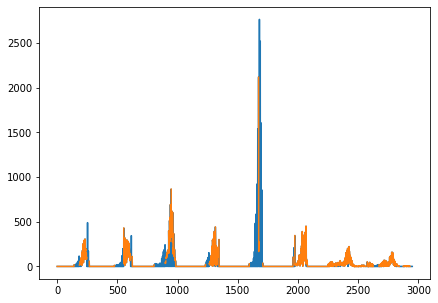

In [76]:
plt.plot(X_filled_knn)
plt.plot(b1)


In [77]:
b=X_filled_knn

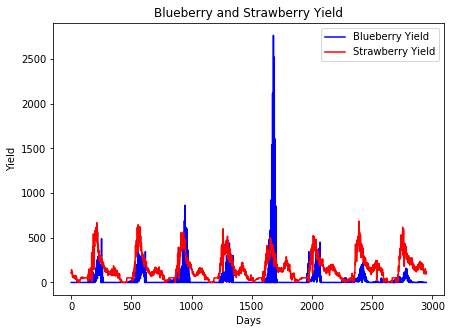

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5
plt.plot(b,color='b',label="Blueberry Yield")
plt.plot(s,color='r',label="Strawberry Yield")
plt.ylabel("Yield")
plt.xlabel("Days")
plt.title("Blueberry and Strawberry Yield")
plt.legend()
plt.savefig('Strawberry and Blueberry Yield', quality=100, dpi=256, optimize=True)

In [79]:
#set random seed for reproducibility
print(tf.__version__)
import os
import random
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
tf.random.set_random_seed(seed=42)
np.random.RandomState(42)
random.seed(42)

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
data=x.values
print(data.shape)
data = series_to_supervised(data, 139)
print(data)

scaler = preprocessing.StandardScaler().fit(data)
scaler

d= scaler.transform(data)

1.15.0
(2951, 1)
      var1(t-139)  var1(t-138)  var1(t-137)  var1(t-136)  var1(t-135)  \
139     23.029219    22.941509    23.314857    23.823008    24.544578   
140     22.941509    23.314857    23.823008    24.544578    24.732229   
141     23.314857    23.823008    24.544578    24.732229    24.296427   
142     23.823008    24.544578    24.732229    24.296427    23.559654   
143     24.544578    24.732229    24.296427    23.559654    22.640521   
...           ...          ...          ...          ...          ...   
2946    10.500922    10.900842    12.176407    12.823652    13.076309   
2947    10.900842    12.176407    12.823652    13.076309    12.858931   
2948    12.176407    12.823652    13.076309    12.858931    13.083156   
2949    12.823652    13.076309    12.858931    13.083156    13.297900   
2950    13.076309    12.858931    13.083156    13.297900    12.819717   

      var1(t-134)  var1(t-133)  var1(t-132)  var1(t-131)  var1(t-130)  ...  \
139     24.732229    24.2964

In [80]:
from sklearn.decomposition import PCA

my_model = PCA(n_components=20)
d=my_model.fit_transform(d)
X=d
    
x_train = X[0:int(0.8*X.shape[0])]
x_test = X[int(0.8*X.shape[0]):]
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

(2249, 20)
(563, 20)


In [81]:
keras.backend.clear_session()

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
tf.random.set_random_seed(seed=42)
np.random.RandomState(42)
random.seed(42)

model_lime_cnn_lstm_att = keras.models.Sequential([
      keras.layers.Conv1D(filters=120, kernel_size=3,
                          strides=1, padding="causal",
                          activation="relu",
                          input_shape=(20, 1)),
      #keras.layers.BatchNormalization(),
      keras.layers.Conv1D(filters=120, kernel_size=3,
                          strides=1, padding="causal",
                          activation="relu"),
      #keras.layers.BatchNormalization(),
      keras.layers.Conv1D(filters=120, kernel_size=3,
                          strides=1, padding="causal",
                          activation="relu"),
      #keras.layers.BatchNormalization(),
      keras.layers.Conv1D(filters=120, kernel_size=3,
                          strides=1, padding="causal",
                          activation="relu"),
      #keras.layers.BatchNormalization(),
      keras.layers.LSTM(100, return_sequences=True, activation='relu'),
      #keras.layers.Dropout(0.15),
      keras.layers.LSTM(100, return_sequences=True, activation='relu'),
      SeqSelfAttention(attention_activation='sigmoid'),
      #tf.keras.layers.Dropout(0.15),
      #tf.keras.layers.LSTM(100, return_sequences=True, activation='relu'),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="relu"),
      #keras.layers.Dropout(0.15),
      keras.layers.Dense(32, activation="relu"),
      #keras.layers.Dropout(0.15),
      keras.layers.Dense(16, activation="relu"),
      keras.layers.Dense(1),
      keras.layers.Lambda(lambda x: x * 400)
])





R2 Score:  -1.0014629894621971  , MAE:  131.70738918575864  , RMSE:  186.14959986541615  , Agg:  318.0894997639086
R2 Score:  -18.785750637781522  , MAE:  139.6681708055273  , RMSE:  177.71351109384747  , Agg:  3139.817407530363


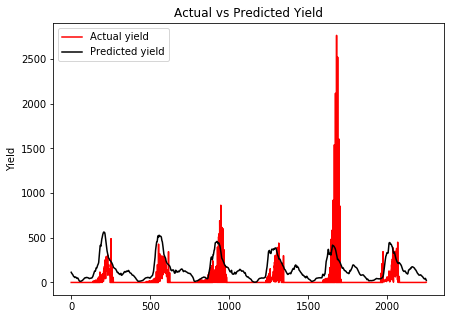

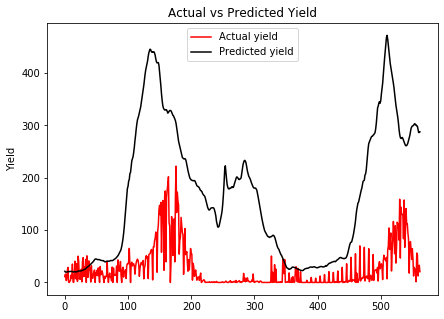

In [82]:
Y=b
Y=Y[:2812]
y_train = Y[0:int(0.8*Y.shape[0])]
y_test = Y[int(0.8*Y.shape[0]):]


#Loading weights trained on strawberry
filepath_lime_cnn_lstm_att1 = "weights_lime_cnn_lstm_att_Strawberry.best.hdf5"
model_lime_cnn_lstm_att.load_weights(filepath_lime_cnn_lstm_att1)

y_pred = model_lime_cnn_lstm_att.predict(x_train)
y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_train)), y_train, color='r', label='Actual yield')
plt.plot(np.arange(len(y_train)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.ylabel('Yield')
plt.legend()
plt.savefig('Lime AC-LSTM 5P week(s) ahead plot.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)





y_pred = model_lime_cnn_lstm_att.predict(x_test)
y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_test)), y_test, color='r', label='Actual yield')
plt.plot(np.arange(len(y_test)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.ylabel('Yield')
plt.legend()
plt.savefig('Lime AC-LSTM 5P week(s) ahead plot.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)

In [84]:
Y=b
Y=Y[:2812]
y_train = Y[0:int(0.8*Y.shape[0])]
y_test = Y[int(0.8*Y.shape[0]):]


#Loading weights trained on strawberry
filepath_lime_cnn_lstm_att1 = "weights_lime_cnn_lstm_att_Strawberry.best.hdf5"
model_lime_cnn_lstm_att.load_weights(filepath_lime_cnn_lstm_att1)

model_lime_cnn_lstm_att.trainable = False

inputs = keras.Input(shape=(20, 1))

x = model_lime_cnn_lstm_att(inputs)
x=keras.layers.Dense(64, activation="relu")(x)
x=keras.layers.Dense(32, activation="relu")(x)
x=keras.layers.Dense(16, activation="relu")(x)

outputs = keras.layers.Dense(1)(x)

#outputs=keras.layers.Lambda(lambda x: x * 400)(x)

model = keras.Model(inputs, outputs)
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=["mae"])

history = model.fit(x_train, y_train,  validation_data= (x_test, y_test),epochs=100)


Train on 2249 samples, validate on 563 samples
Epoch 1/100
2249/2249 [==============================] - 1s 394us/step - loss: 17687.2452 - mae: 35.2890 - val_loss: 1334.3998 - val_mae: 21.6243
Epoch 2/100
2249/2249 [==============================] - 1s 254us/step - loss: 16083.1006 - mae: 39.2421 - val_loss: 1090.1952 - val_mae: 23.6518
Epoch 3/100
2249/2249 [==============================] - 1s 258us/step - loss: 15476.0057 - mae: 43.6584 - val_loss: 1234.0575 - val_mae: 27.1924
Epoch 4/100
2249/2249 [==============================] - 1s 257us/step - loss: 15227.2375 - mae: 45.9015 - val_loss: 1438.2676 - val_mae: 29.9124
Epoch 5/100
2249/2249 [==============================] - 1s 257us/step - loss: 15149.1962 - mae: 48.4103 - val_loss: 1624.9089 - val_mae: 31.8812
Epoch 6/100
2249/2249 [==============================] - 1s 257us/step - loss: 15128.6790 - mae: 48.6938 - val_loss: 1666.2177 - val_mae: 32.2814
Epoch 7/100
2249/2249 [==============================] - 1s 257us/step - loss

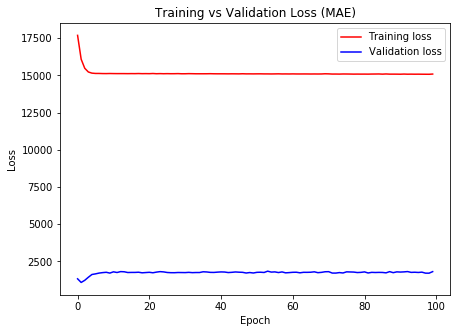

In [85]:
plt.figure()
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], color='r', label='Training loss')
plt.plot(np.arange(len(history.history['loss'])), history.history['val_loss'], color='b', label='Validation loss')
plt.title('Training vs Validation Loss (MAE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('CNN-LSTM attention Lime 5P week(s) ahead - loss curve.jpg', quality=100, dpi=256, optimize=True)
    

R2 Score:  0.12969243247743867  , MAE:  49.153846121113844  , RMSE:  122.75090567910436  , Agg:  74.80500319240878
R2 Score:  -0.13846518641862793  , MAE:  33.405692211037326  , RMSE:  42.62889340461774  , Agg:  43.28136434359493


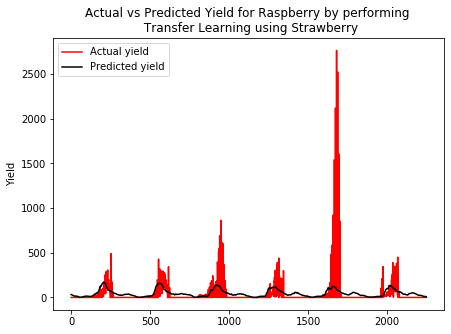

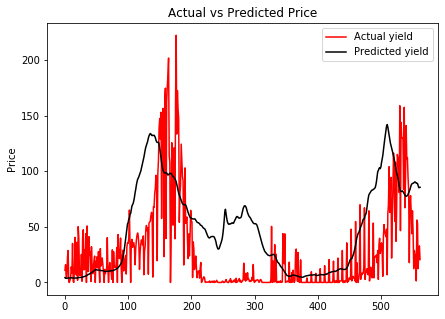

In [87]:
Y=b
Y=Y[:2812]
y_train = Y[0:int(0.8*Y.shape[0])]
y_test = Y[int(0.8*Y.shape[0]):]


y_pred = model.predict(x_train)
y_pred=y_pred
y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_train)), y_train, color='r', label='Actual yield')
plt.plot(np.arange(len(y_train)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Yield for Raspberry by performing \n Transfer Learning using Strawberry')
plt.ylabel('Yield')
plt.legend()
plt.savefig('Transfer Learning on Raspberry using Strawberry.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)





y_pred = model.predict(x_test)
y_pred=y_pred

y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_test)), y_test, color='r', label='Actual yield')
plt.plot(np.arange(len(y_test)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Price')
plt.ylabel('Price')
plt.legend()
plt.savefig('Lime AC-LSTM 5P week(s) ahead plot.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)

In [88]:
model_lime_cnn_lstm_att.trainable = True

optimizer = keras.optimizers.Adam(lr=1e-5)
model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=["mae"])

history = model.fit(x_train, y_train,  validation_data= (x_test, y_test),epochs=100)

Train on 2249 samples, validate on 563 samples
Epoch 1/100
2249/2249 [==============================] - 3s 1ms/step - loss: 14585.2172 - mae: 43.0018 - val_loss: 1132.4801 - val_mae: 24.8091
Epoch 2/100
2249/2249 [==============================] - 2s 791us/step - loss: 13818.4692 - mae: 37.2972 - val_loss: 1266.2520 - val_mae: 24.4217
Epoch 3/100
2249/2249 [==============================] - 2s 787us/step - loss: 13355.3738 - mae: 33.9329 - val_loss: 1309.4911 - val_mae: 23.1575
Epoch 4/100
2249/2249 [==============================] - 2s 796us/step - loss: 13085.5332 - mae: 33.0343 - val_loss: 1465.1293 - val_mae: 23.1338
Epoch 5/100
2249/2249 [==============================] - 2s 786us/step - loss: 12898.0985 - mae: 31.3839 - val_loss: 1722.7415 - val_mae: 24.2650
Epoch 6/100
2249/2249 [==============================] - 2s 806us/step - loss: 12703.8334 - mae: 30.5367 - val_loss: 2020.2424 - val_mae: 25.6528
Epoch 7/100
2249/2249 [==============================] - 2s 795us/step - loss: 

R2 Score:  0.32679963008963675  , MAE:  25.938637874420085  , RMSE:  107.95940893214936  , Agg:  45.07010732022884
R2 Score:  -2.5393210593646907  , MAE:  35.76919078133621  , RMSE:  75.163009674747  , Agg:  196.31233661794033


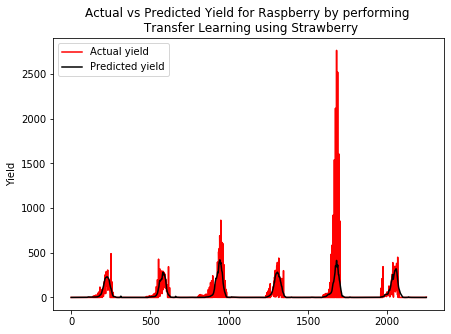

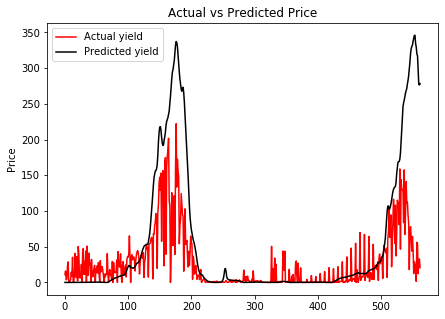

In [89]:
Y=b
Y=Y[:2812]
y_train = Y[0:int(0.8*Y.shape[0])]
y_test = Y[int(0.8*Y.shape[0]):]


y_pred = model.predict(x_train)
y_pred=y_pred
y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_train)), y_train, color='r', label='Actual yield')
plt.plot(np.arange(len(y_train)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Yield for Raspberry by performing \n Transfer Learning using Strawberry')
plt.ylabel('Yield')
plt.legend()
plt.savefig('Transfer Learning on Raspberry using Strawberry.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)





y_pred = model.predict(x_test)
y_pred=y_pred

y_pred_1x = y_pred
    
plt.figure()
plt.plot(np.arange(len(y_test)), y_test, color='r', label='Actual yield')
plt.plot(np.arange(len(y_test)), y_pred, color='k', label='Predicted yield')
plt.title('Actual vs Predicted Price')
plt.ylabel('Price')
plt.legend()
plt.savefig('Lime AC-LSTM 5P week(s) ahead plot.jpg', quality=100, dpi=256, optimize=True)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
agg_err = ((np.sqrt(mse) + mae)/2) * (1-r2)

print('R2 Score: ', r2, ' , MAE: ', mae, ' , RMSE: ',np.sqrt(mse), ' , Agg: ', agg_err)